In [1]:
# Compedium : Stock Investment Strategy Using MACD Crossover To Determine When To Buy & Sell

# Import The Needed Library
import pandas as pd
import numpy as np
from datetime import datetime

# Store The Data Into The 'df' (DataFrame) Variable
df = pd.read_csv('2327 國巨.csv')

# Set The Date As The Index For The Data
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

# Calculate The MACD & Signal Line Indicators

# Calculate The Short Term Exponential Moving Average
ShortEMA = df.Close.ewm(span=12, adjust=False).mean() # Fast Moving Average

# Calculate The Long Term Exponential Moving Average
LongEMA = df.Close.ewm(span=26, adjust=False).mean() # Slow Moving Average

# Calculate The Moving Average Convergence / Divergence (MACD)
MACD = ShortEMA - LongEMA

# Calcualte The Signal Line
signal = MACD.ewm(span=9, adjust=False).mean()

# Create New Columns For The DataFrame 
df['MACD'] = MACD
df['Signal Line'] = signal

# Create A Function To Signal When To Buy And Sell An Asset
def buy_sell(signal):
  sigPriceBuy = []
  sigPriceSell = []
  flag = (-1)

  for i in range(0, len(signal)):
    # If MACD > Signal Line, Buy The Stock. If Not, Sell The Stock
      if signal['MACD'][i] > signal['Signal Line'][i]:
        if flag != 1:
          sigPriceBuy.append(signal['Close'][i])
          sigPriceSell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
            
      elif signal['MACD'][i] < signal['Signal Line'][i]: 
        if flag != 0:
          sigPriceSell.append(signal['Close'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
            
      else: # Handling nan values
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

# Create buy and sell columns
x = buy_sell(df)
df['Buy_Signal_Price'] = x[0]
df['Sell_Signal_Price'] = x[1]



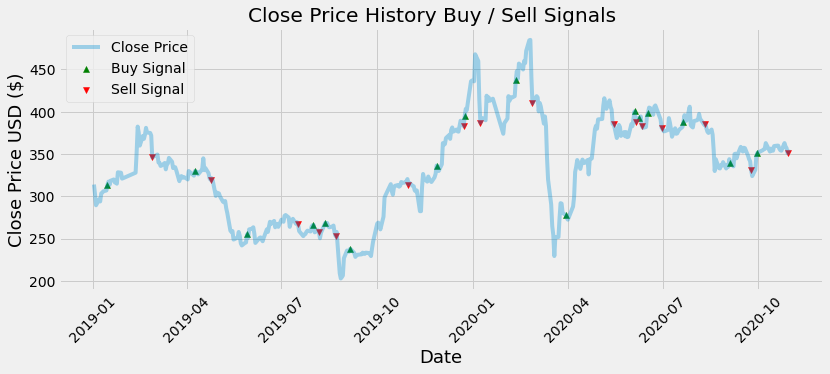

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

df = pd.read_csv('2327 國巨.csv')

df = df.set_index(pd.DatetimeIndex(df['Date'].values))

ShortEMA = df.Close.ewm(span=12, adjust=False).mean() # Fast Moving Average

LongEMA = df.Close.ewm(span=26, adjust=False).mean() # Slow Moving Average

MACD = ShortEMA - LongEMA

signal = MACD.ewm(span=9, adjust=False).mean()

df['MACD'] = MACD
df['Signal Line'] = signal

def InvestStrategy(signal):
    BuyStock = []
    SellStock = []
    flag = 0

  # If MACD > Signal Line, Buy The Stock. If Not, Sell The Stock
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            if flag == 0:
                BuyStock.append(signal['Close'][i])
                SellStock.append(np.nan)
                flag = 1
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        elif signal['MACD'][i] < signal['Signal Line'][i]: 
            if flag == 1:
                SellStock.append(signal['Close'][i])
                BuyStock.append(np.nan)
                flag = 0
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        else: # Handling nan values
            BuyStock.append(np.nan)
            SellStock.append(np.nan)
  
    return (BuyStock, SellStock)

temp = InvestStrategy(df)
df['BuyStockPrice'] = temp[0]
df['SellStockPrice'] = temp[1]



# Visualize The Strategy
title = 'Close Price History Buy / Sell Signals   '
my_stocks = df
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(my_stocks.index, my_stocks['BuyStockPrice'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['SellStockPrice'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( my_stocks['Close'],  label='Close Price', alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()